# Independent Halting Cascade (IHC) Model 
Homogeneous parameters, incentives, and empirical chain distribution

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# standard libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# parallel computing
from itertools import product
from functools import partial
from joblib import Parallel, delayed

# local libraries
import sys
sys.path.append("../src")
from model import IndependentHaltingCascade as IHC
from network_generators.erdos_renyi import generate_erdos_renyi_edgelist
from network_generators.barabasi_albert import generate_barabasi_albert
from utils.simulation_helpers import run_model, perform_independent_model_simulations, save_experiment
import utils.simulation_helpers as sh
import theoretical_boundaries as bd
from incentives_mechanism import p_incentives, p_incentives_inv

In [3]:
## Global parameters
# Network
N_NODES = 2000
K_AVG = 20
ER_GENERATOR = lambda: generate_erdos_renyi_edgelist(n_nodes=N_NODES, prob_edge=K_AVG/N_NODES)
BA_GENERATOR = lambda: generate_barabasi_albert(N_NODES, K_AVG)

# IHC
P_RECOMMENDATION = 0.1
P_APPLICATION = 0.25 # same as Milgram's dropout rate
P_HIRING = 0.1

# grid
N_SIMULATIONS = 200
NEW_EDGELIST_EVERY = N_SIMULATIONS // 10

# saving
PATH = '../results/data/homogeneous'
FN_SUFFIX = 'n_nodes={n_nodes}-k_avg={k_avg}_ph={ph}.npy'

# Homogeneous parameter grid ER network

In [4]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
p_recs = np.linspace(0.001, 0.999, num=grid_resolution)[::-1] 
p_apps = np.linspace(0.001, 0.999, num=grid_resolution)
p_hirs = [0.1, 0.5, 1.0]

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = ER_GENERATOR,
            hiring_probs = P_HIRING)

print(f"TOTAL: {grid_resolution**2} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5)
for ph in p_hirs:
    print(f"{ph=}")
    
    # Perform experiments in parallel
    vals = pp(    # use all cores
        delayed(f)(recommendation_probs=pr, application_probs=pa, hiring_probs=ph)
        for pr in p_recs
        for pa in p_apps
    )
    
    # Unzip values into different result diagnostics
    depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

    # Save
    fn_suffix = FN_SUFFIX.format(n_nodes=N_NODES, k_avg=K_AVG, ph=ph)
    fn_depth      = os.path.join( PATH, 'grid', 'ER', 'chain_depths', fn_suffix )
    fn_applicants = os.path.join( PATH, 'grid', 'ER', 'applicants', fn_suffix )
    fn_size       = os.path.join( PATH, 'grid', 'ER', 'chain_size', fn_suffix )
    fn_success    = os.path.join( PATH, 'grid', 'ER', 'success_rate', fn_suffix )    
    save_experiment(fn_depth, depths_dist, p_recs, p_apps)
    save_experiment(fn_applicants, sizes_dist, p_recs, p_apps)
    save_experiment(fn_size, sizes_tot_dist, p_recs, p_apps)
    save_experiment(fn_success, successes_dist, p_recs, p_apps)

TOTAL: 2500 tasks...
ph=0.1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 19.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ph=0.5


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 16.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ph=1.0


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 2162 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 15.4min finished


In [39]:
### STATE SPACE BOUNDARIES ###
q = 0.5 # curve quantile
# Diffusion
pa_boundary, pr_boundary_diffusion_median = bd.diffusion_boundary_quantile_contour_pr(P_HIRING, K_AVG, q=q)
pa_boundary, pr_boundary_diffusion = bd.diffusion_boundary_contour_pr(P_HIRING, K_AVG)
# Failure probability
pa_boundary, pr_boundary_failure = bd.success_contour_at_prob_tau(P_HIRING, K_AVG, tau=q)

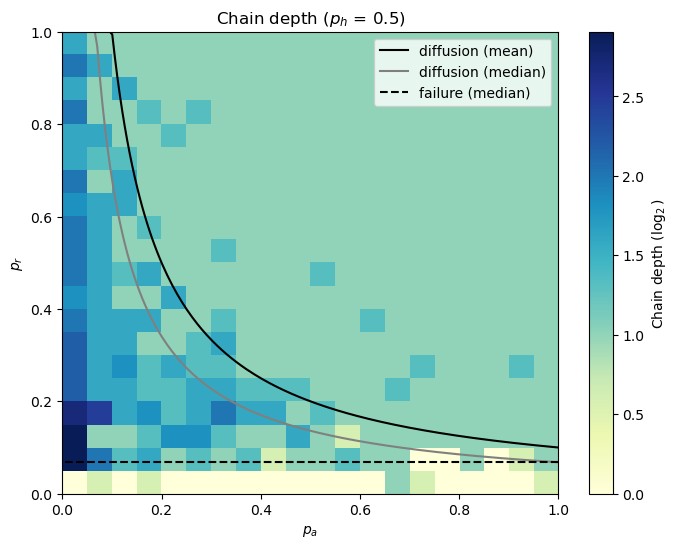

In [41]:
### CHAIN DEPTH PLOT ###
depths = np.median(depths_dist, axis=1).reshape( len(p_recs), len(p_apps) )

plt.figure(figsize=(8, 6))
plt.imshow( np.log2(depths) , cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='upper')
cbar = plt.colorbar()
cbar.set_label("Chain depth ($\log_2$)")

plt.plot(pa_boundary, pr_boundary_diffusion, color='black', label='diffusion (mean)')
plt.plot(pa_boundary, pr_boundary_diffusion_median, color='grey', label='diffusion (median)')
plt.plot(pa_boundary, pr_boundary_failure, color='black', ls='--', label='failure (median)')

plt.xlabel('$p_a$')
plt.ylabel('$p_r$')
plt.title('Chain depth ($p_h$ = {})'.format(P_HIRING))
plt.legend();

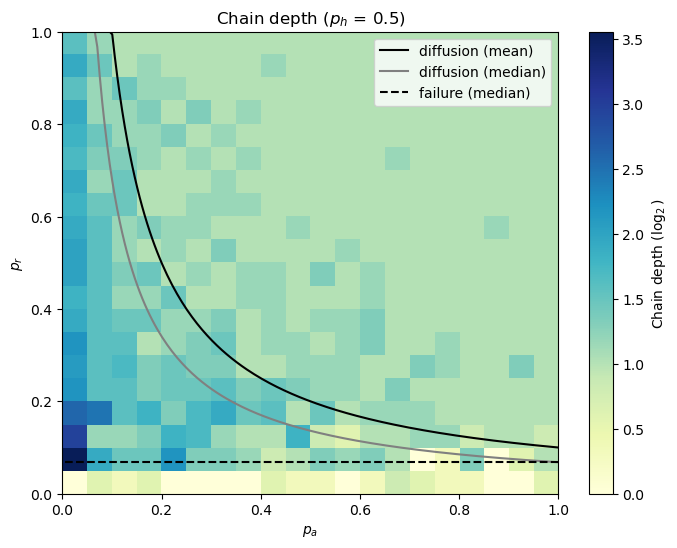

In [42]:
### CHAIN DEPTH PLOT ###
depths = np.mean(depths_dist, axis=1).reshape( len(p_recs), len(p_apps) )

plt.figure(figsize=(8, 6))
plt.imshow( np.log2(depths) , cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='upper')
cbar = plt.colorbar()
cbar.set_label("Chain depth ($\log_2$)")

plt.plot(pa_boundary, pr_boundary_diffusion, color='black', label='diffusion (mean)')
plt.plot(pa_boundary, pr_boundary_diffusion_median, color='grey', label='diffusion (median)')
plt.plot(pa_boundary, pr_boundary_failure, color='black', ls='--', label='failure (median)')

plt.xlabel('$p_a$')
plt.ylabel('$p_r$')
plt.title('Chain depth ($p_h$ = {})'.format(p_hiring))
plt.legend();

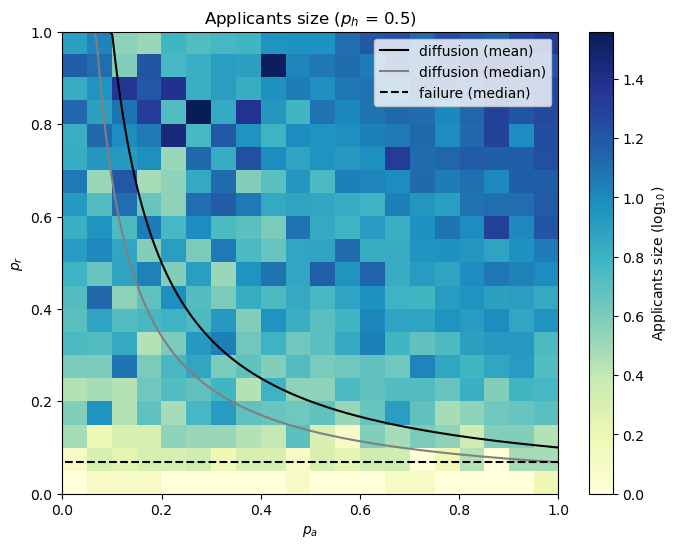

In [45]:
### CHAIN DEPTH PLOT ###
sizes = np.mean(sizes_dist, axis=1).reshape( len(p_recs), len(p_apps) )

plt.figure(figsize=(8, 6))
plt.imshow( np.log10(sizes + 1) , cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='upper')
# plt.imshow( sizes , cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='upper')
cbar = plt.colorbar()
cbar.set_label("Applicants size ($\log_{10}$)")

plt.plot(pa_boundary, pr_boundary_diffusion, color='black', label='diffusion (mean)')
plt.plot(pa_boundary, pr_boundary_diffusion_median, color='grey', label='diffusion (median)')
plt.plot(pa_boundary, pr_boundary_failure, color='black', ls='--', label='failure (median)')

plt.xlabel('$p_a$')
plt.ylabel('$p_r$')
plt.title('Applicants size ($p_h$ = {})'.format(p_hiring))
plt.legend();

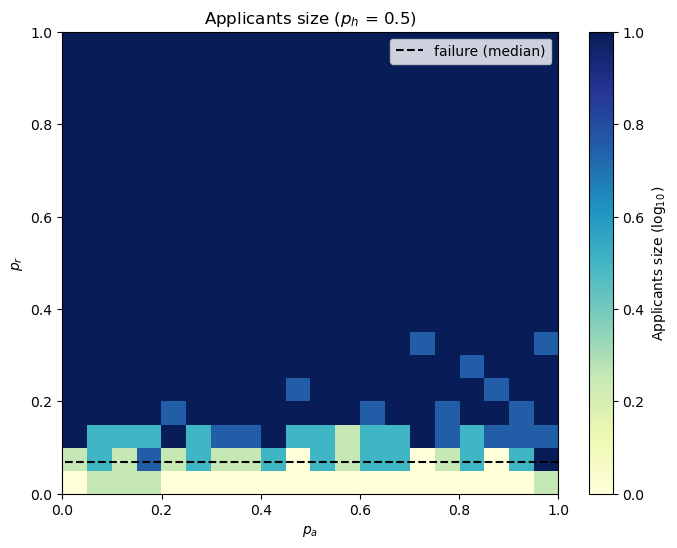

In [46]:
### CHAIN DEPTH PLOT ###
successes = np.mean(successes_dist, axis=1).reshape( len(p_recs), len(p_apps) )

plt.figure(figsize=(8, 6))
plt.imshow( successes , cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='upper')
cbar = plt.colorbar()
cbar.set_label("Applicants size ($\log_{10}$)")

# plt.plot(pa_boundary, pr_boundary_diffusion, color='black', label='diffusion (mean)')
# plt.plot(pa_boundary, pr_boundary_diffusion_median, color='grey', label='diffusion (median)')
plt.plot(pa_boundary, pr_boundary_failure, color='black', ls='--', label='failure (median)')

plt.xlabel('$p_a$')
plt.ylabel('$p_r$')
plt.title('Applicants size ($p_h$ = {})'.format(p_hiring))
plt.legend();

# Incentives mechanism

In [5]:
# TODO: Handle cases where no nodes are within k0_range
def run_model_incentives(edgelist, recommendation_probs, β, fv=1, **kw):
    """Run model conditioning that the degree of the initial spreader is within k0_range.
    """
    # Increase recommendation probability based on incentives
    if β != 0:
        recommendation_probs = p_incentives(recommendation_probs, fv=fv, β=β)
    return run_model(edgelist, recommendation_probs=recommendation_probs, **kw)

In [6]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
p_recs = np.linspace(0.001, 0.999, num=grid_resolution)[::-1] 
betas = [0, 0.5, 1, 2, 4, 8, 16] # incentive strength

# ich parameters (specific for this setting)
p_hiring = 0.01
p_application = 0.7

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = ER_GENERATOR,
            application_probs = p_application,
            hiring_probs = p_hiring,
            run_model_func = run_model_incentives)

# Perform experiments in parallel
print(f"TOTAL: {grid_resolution*len(betas)} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5)
vals = pp(
    delayed(f)(recommendation_probs=pr, β=β,)
    for pr in p_recs
    for β in betas
)

# Unzip values into different result diagnostics
depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

# Save
fn_suffix = f'n_nodes={N_NODES}-k_avg={K_AVG}-pa={p_application}-ph={p_hiring}.npy'
fn_depth      = os.path.join( PATH, 'incentives', 'ER', 'chain_depths', fn_suffix )
fn_applicants = os.path.join( PATH, 'incentives', 'ER', 'applicants', fn_suffix )
fn_size       = os.path.join( PATH, 'incentives', 'ER', 'chain_size', fn_suffix )
fn_success    = os.path.join( PATH, 'incentives', 'ER', 'success_rate', fn_suffix )    
save_experiment(fn_depth, depths_dist, p_recs, betas)
save_experiment(fn_applicants, sizes_dist, p_recs, betas)
save_experiment(fn_size, sizes_tot_dist, p_recs, betas)
save_experiment(fn_success, successes_dist, p_recs, betas)
print("Saved successfully!")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


TOTAL: 350 tasks...


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.7min


Saved successfully!


[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  3.4min finished


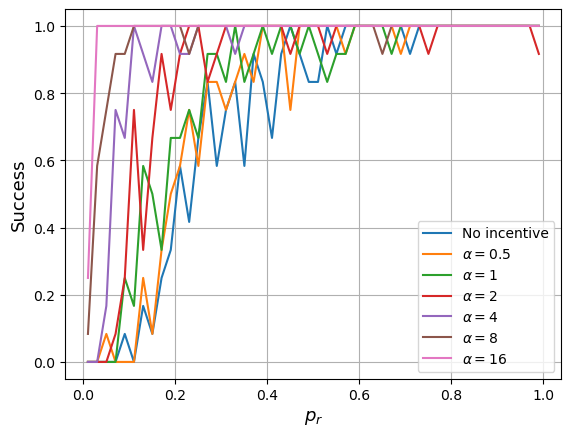

In [132]:
successes = np.mean(successes_dist, axis=1).reshape( len(p_recs), len(betas) )
labels = [f"${α=}$" if α != 0 else "No incentive" for α in betas]
plt.plot(p_recs, successes, marker=None, label=labels)
plt.xlabel("$p_r$", size=13)
plt.ylabel("Success", size=13)
plt.grid()
plt.legend();

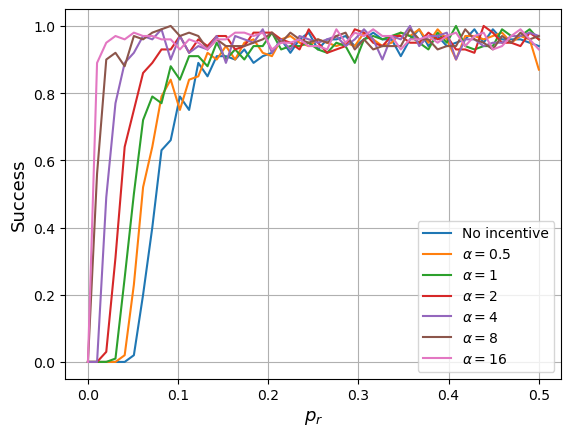

In [140]:
successes = np.mean(successes_dist, axis=1).reshape( len(p_recs), len(αs) )
labels = [f"${α=}$" if α != 0 else "No incentive" for α in αs]
plt.plot(p_recs, successes, marker=None, label=labels)
plt.xlabel("$p_r$", size=13)
plt.ylabel("Success", size=13)
plt.grid()
plt.legend();

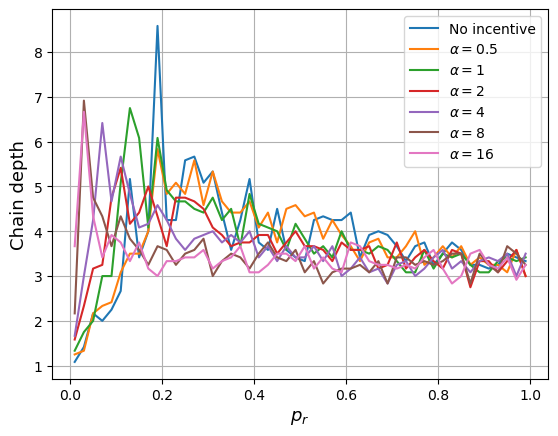

In [133]:
depths = np.mean(depths_dist, axis=1).reshape( len(p_recs), len(αs) )
labels = [f"${α=}$" if α != 0 else "No incentive" for α in αs]
plt.plot(p_recs, depths, marker=None, label=labels)
plt.xlabel("$p_r$", size=13)
plt.ylabel("Chain depth", size=13)
plt.grid()
plt.legend();

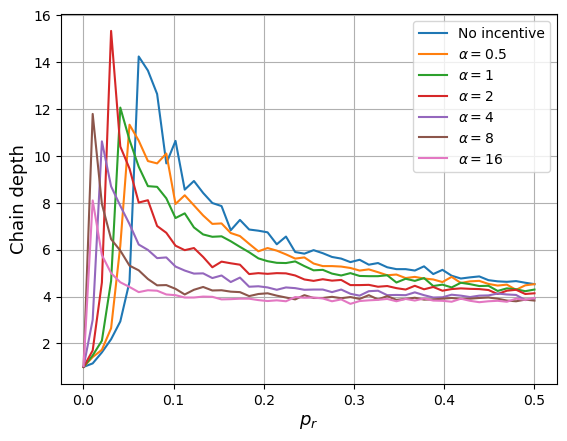

In [139]:
depths = np.mean(depths_dist, axis=1).reshape( len(p_recs), len(αs) )
labels = [f"${α=}$" if α != 0 else "No incentive" for α in αs]
plt.plot(p_recs, depths, marker=None, label=labels)
plt.xlabel("$p_r$", size=13)
plt.ylabel("Chain depth", size=13)
plt.grid()
plt.legend();

/Users/blaskolic/Research/ResearchProjects/Incentivized Network Dynamics/independent_halting_cascades/notebooks/../src/incentives_mechanism.py:6: RuntimeWarning: invalid value encountered in divide
  return - np.log( 1 - x*(1-np.exp(-β)) )/β


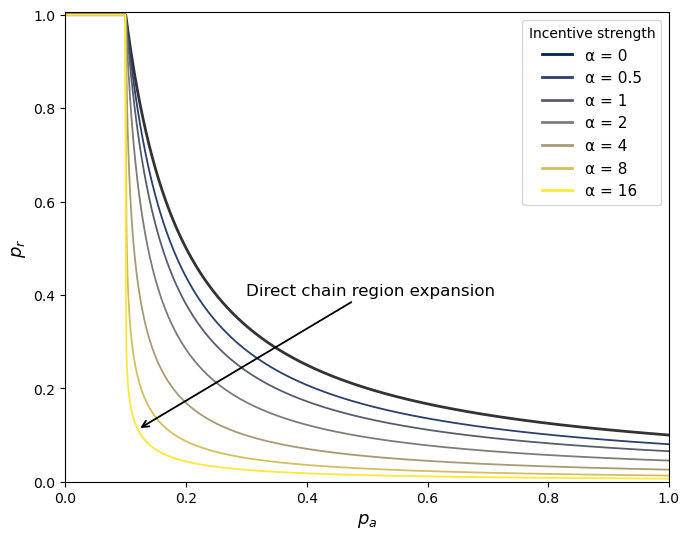

In [134]:
from matplotlib.lines import Line2D
## Parameters
# k_avg = 20 # average degree
ph = 0.5 # halting probability
fv = 1.0 # v's fitness
pa = np.linspace(0.0001, 0.9999, 1000)  # smooth curves

## Viz
cmap = plt.get_cmap('cividis', len(αs))
fig, ax = plt.subplots(figsize=(7, 5.5))

# Vanilla boundaries
pr_diff = np.clip(1 / (pa * ph * k_avg), 0, 1)
ax.plot(pa, pr_diff, ls=None, lw=2, color="black", alpha=0.8)#, zorder=3)
# Boundaries after incentives
for i,α in enumerate(αs):
    pr_diff_α = np.clip(p_incentives_inv(pr_diff, fv, α), 0, 1)
    ax.plot(pa, pr_diff_α, ls=None, lw=1.3, color=cmap(i))    

α_handles = [Line2D([0], [0], color=cmap(i), lw=2, label=f"α = {α}") for i,α in enumerate(αs)]
ax.legend(handles=α_handles, loc="upper right", frameon=True, title="Incentive strength", fontsize=11)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.005)
ax.set_xlabel(r"$p_a$", size=13)
ax.set_ylabel(r"$p_r$", size=13)
# text annotation
ax.annotate("Direct chain region expansion", fontsize=12,
            xy=(0.12, np.interp(0.12, pa, pr_diff_α)), # arrow end position
            arrowprops=dict(arrowstyle="->", lw=1.3),
            xytext=(0.30, 0.40), # text position
           )

plt.tight_layout()
# # Optional: save
# # plt.savefig("multi_k_boundaries_lines_and_legend.svg", bbox_inches="tight")
# # plt.savefig("multi_k_boundaries_lines_and_legend.png", bbox_inches="tight")

# Heterogenous degrees (BA network)

In [8]:
### SIMULATIONS 
np.random.seed(42) # for reproducibility

# grid parameters
grid_resolution = 50
k_step, k_max = 10, 100
p_recs = np.linspace(0, 1, num=grid_resolution+1)[::-1] 
p_recs[-1] = 1e-3
k0_ranges = np.arange(0, k_max+1, k_step)
k0_ranges = list(zip(k0_ranges[:-1], k0_ranges[1:]))

# Partial function
f = partial(perform_independent_model_simulations, 
            n_simulations = N_SIMULATIONS,
            new_edgelist_every = NEW_EDGELIST_EVERY,
            edgelist_generator = BA_GENERATOR, # barabasi-albert networks
            hiring_probs = P_HIRING,
            application_probs = P_APPLICATION)

# Perform experiments in parallel
print(f"TOTAL: {grid_resolution*len(k0_ranges)} tasks...")
pp = Parallel(n_jobs=-1, prefer="processes", verbose=5) # use all cores    
vals = pp(    
    delayed(f)(recommendation_probs=pr, k0_range=k0_range)
    for pr in p_recs
    for k0_range in k0_ranges
)

# Unzip values into different result diagnostics
depths_dist, sizes_tot_dist, sizes_dist, successes_dist = zip(*vals)

# Save
fn_suffix = f'n_nodes={N_NODES}-pa={P_APPLICATION}-ph={P_HIRING}.npy'
fn_depth      = os.path.join( PATH, 'pr_vs_k0', 'BA', 'chain_depths', fn_suffix )
fn_applicants = os.path.join( PATH, 'pr_vs_k0', 'BA', 'applicants', fn_suffix )
fn_size       = os.path.join( PATH, 'pr_vs_k0', 'BA', 'chain_size', fn_suffix )
fn_success    = os.path.join( PATH, 'pr_vs_k0', 'BA', 'success_rate', fn_suffix )    
save_experiment(fn_depth, depths_dist, p_recs, k0_ranges)
save_experiment(fn_applicants, sizes_dist, p_recs, k0_ranges)
save_experiment(fn_size, sizes_tot_dist, p_recs, k0_ranges)
save_experiment(fn_success, successes_dist, p_recs, k0_ranges)

TOTAL: 500 tasks...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 510 out of 510 | elapsed:  5.6min finished


In [158]:
# aggregate results
successes = np.mean(successes_dist, axis=1).reshape( len(p_recs), len(k0_ranges) )
depths = np.mean(depths_dist, axis=1).reshape( len(p_recs), len(k0_ranges) )
sizes = np.mean(sizes_dist, axis=1).reshape( len(p_recs), len(k0_ranges) )

# successful chains
depths_succ_dist = [list(np.array(v)[b]) for v,b in zip(depths_dist, successes_dist)]
depths_succ = np.array([np.mean(s) for s in depths_succ_dist]).reshape( len(p_recs), len(k0_ranges) )

/Users/blaskolic/miniconda3/envs/networks/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/blaskolic/miniconda3/envs/networks/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


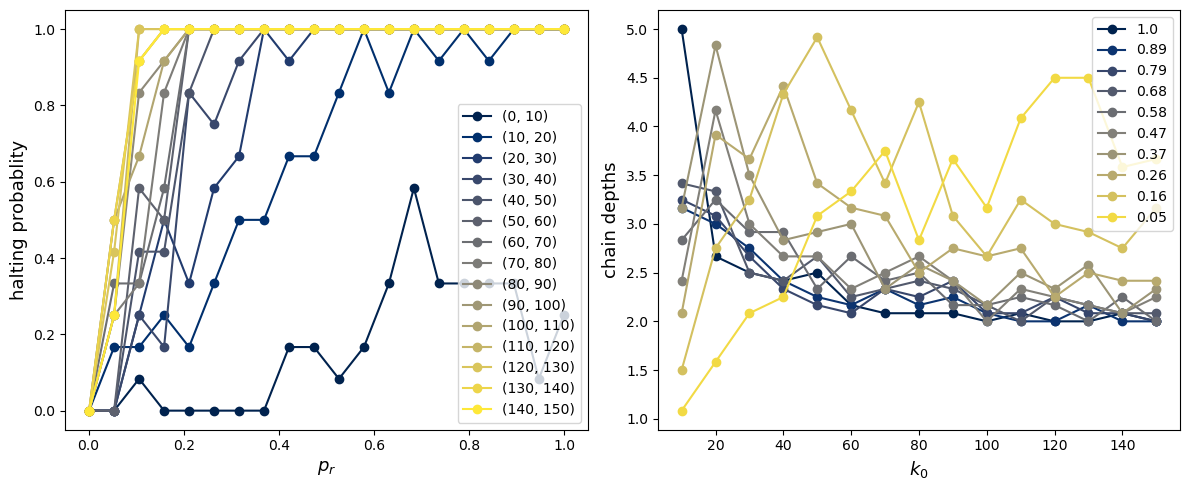

In [160]:
## IMITATING PAPER'S FIGURE (all chains) ## 
plt.figure(figsize=(12,5))
plt.subplot(121)
cmap = plt.get_cmap('cividis', successes.shape[1])
# plt.plot(p_recs, successes, label=k0_ranges, cmap='cividis')
[plt.plot(p_recs, successes[:,i], marker='o', label=k0_ranges[i], color=cmap(i)) for i in range(successes.shape[1])]
plt.xlabel("$p_r$", size=13)
plt.ylabel("halting probablity", size=13)
plt.legend();

plt.subplot(122)
ks = [k[1] for k in k0_ranges]
cmap = plt.get_cmap('cividis', depths.shape[0])
[plt.plot(ks, depths.T[:,i], marker='o', label=p_recs.round(2)[i], color=cmap(i)) for i in range(0, depths.shape[0], 2)]
# plt.xscale('log')
plt.xlabel("$k_0$", size=13)
plt.ylabel("chain depths", size=13)
plt.legend()

plt.tight_layout();

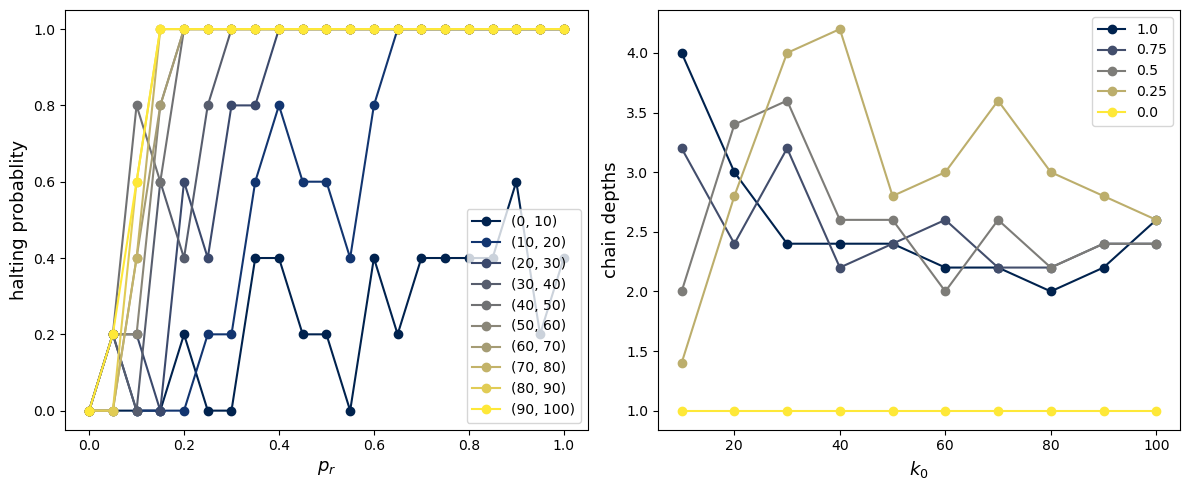

In [13]:
## IMITATING PAPER'S FIGURE (all chains) ## 
plt.figure(figsize=(12,5))
plt.subplot(121)
cmap = plt.get_cmap('cividis', successes.shape[1])
# plt.plot(p_recs, successes, label=k0_ranges, cmap='cividis')
[plt.plot(p_recs, successes[:,i], marker='o', label=k0_ranges[i], color=cmap(i)) for i in range(successes.shape[1])]
plt.xlabel("$p_r$", size=13)
plt.ylabel("halting probablity", size=13)
plt.legend();

plt.subplot(122)
ks = [k[1] for k in k0_ranges]
cmap = plt.get_cmap('cividis', depths.shape[0])
[plt.plot(ks, depths.T[:,i], marker='o', label=p_recs.round(2)[i], color=cmap(i)) for i in range(0, depths.shape[0], 5)]
# plt.xscale('log')
plt.xlabel("$k_0$", size=13)
plt.ylabel("chain depths", size=13)
plt.legend()

plt.tight_layout();

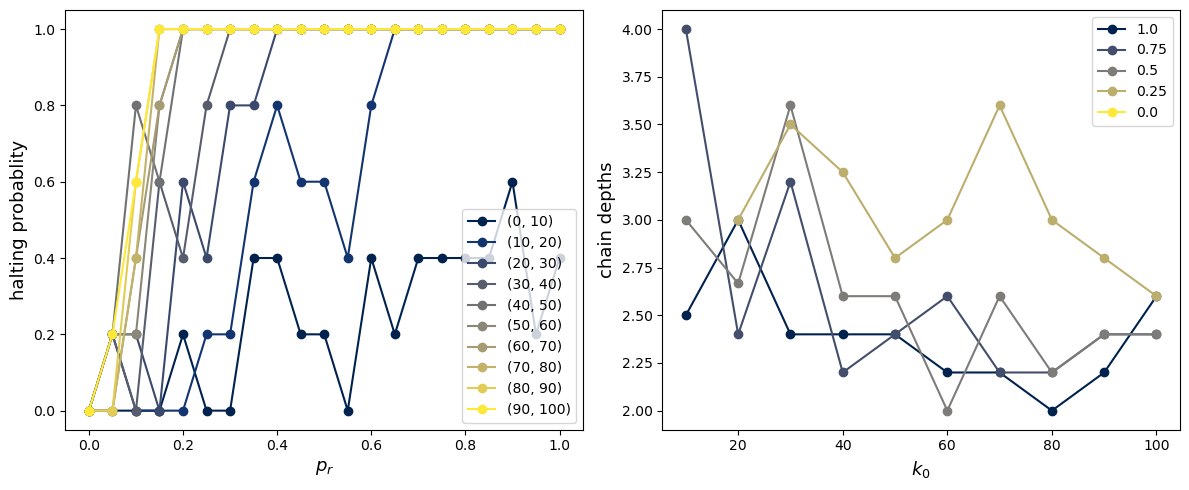

In [14]:
## IMITATING PAPER'S FIGURE (successful chains only) ## 
plt.figure(figsize=(12,5))
plt.subplot(121)
cmap = plt.get_cmap('cividis', successes.shape[1])
# plt.plot(p_recs, successes, label=k0_ranges, cmap='cividis')
[plt.plot(p_recs, successes[:,i], marker='o', label=k0_ranges[i], color=cmap(i)) for i in range(successes.shape[1])]
plt.xlabel("$p_r$", size=13)
plt.ylabel("halting probablity", size=13)
plt.legend();

plt.subplot(122)
ks = [k[1] for k in k0_ranges]
cmap = plt.get_cmap('cividis', depths.shape[0])
[plt.plot(ks, depths_succ.T[:,i], marker='o', label=p_recs.round(2)[i], color=cmap(i)) for i in range(0, depths.shape[0], 5)]
# [plt.plot(ks, depths.T[:,i], label=p_recs.round(2)[i], color=cmap(i)) for i in range(0, depths.shape[0], 2)]
# plt.plot(ks, depths.T[:,::3], label=p_recs.round(2)[::3], cmap='cividis')
# plt.xscale('log')
plt.xlabel("$k_0$", size=13)
plt.ylabel("chain depths", size=13)
plt.legend()

plt.tight_layout();

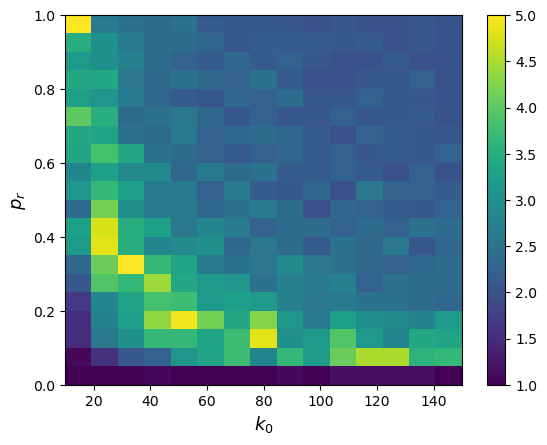

In [161]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(depths, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

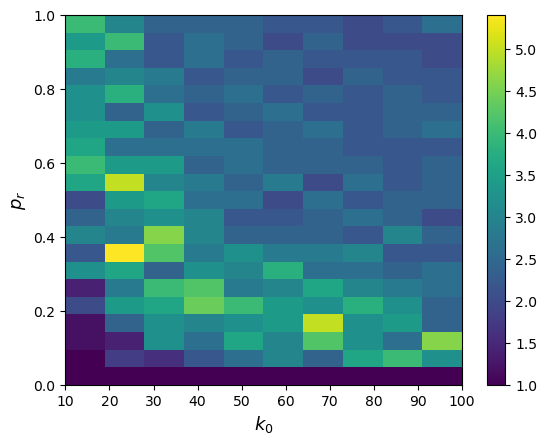

In [15]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(depths, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

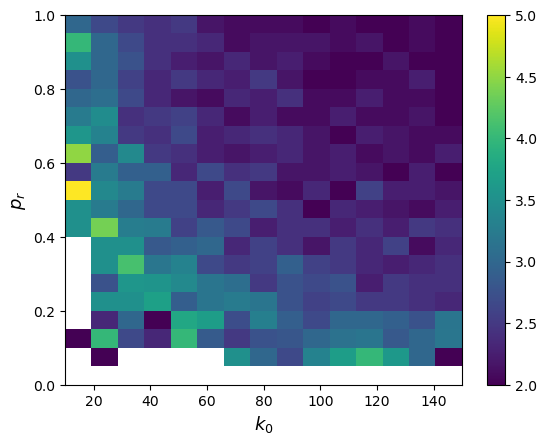

In [162]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(depths_succ, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

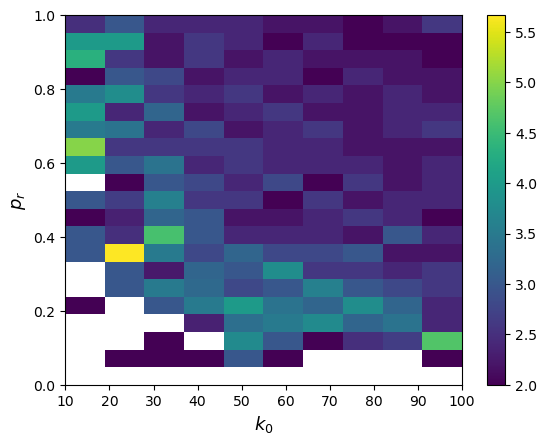

In [16]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(depths_succ, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

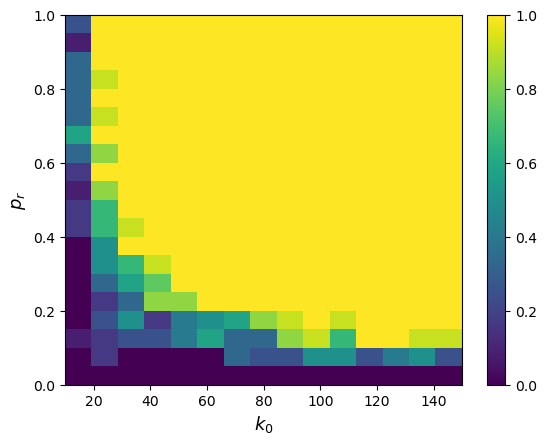

In [163]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(successes, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

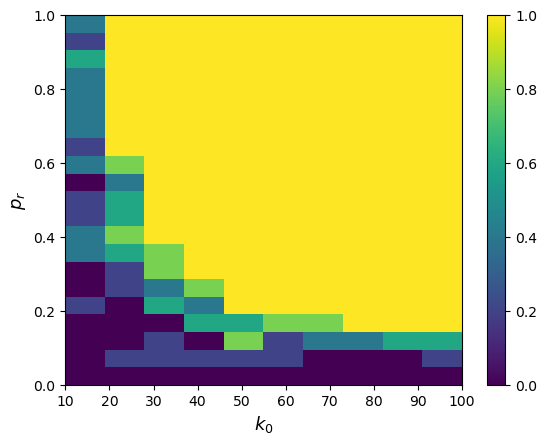

In [17]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(successes, extent=[km,kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

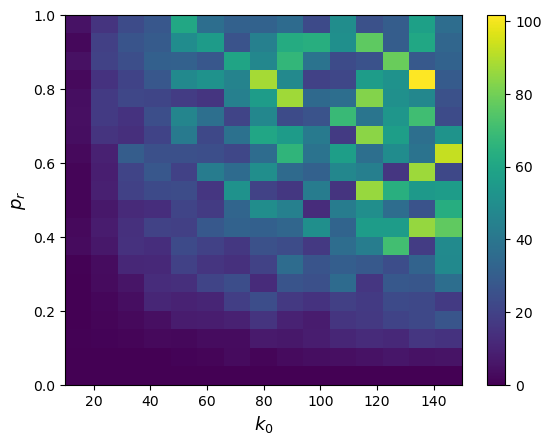

In [164]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(sizes, extent=[km, kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

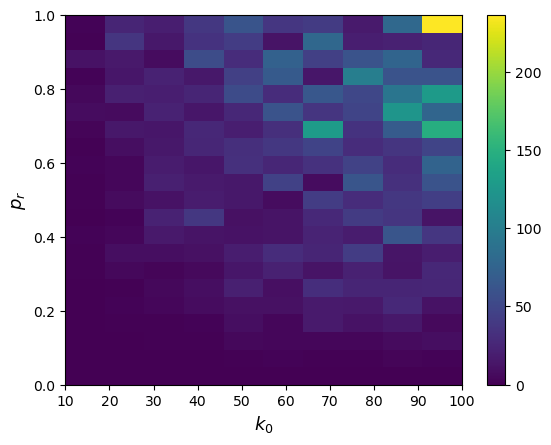

In [18]:
km, kM = max(min(k0_ranges)), max(max(k0_ranges))
plt.imshow(sizes, extent=[km, kM,0,1], aspect='auto')
plt.xlabel('$k_0$', size=13)
plt.ylabel('$p_r$', size=13)
plt.colorbar();

# Empirical chain length distribution

In [11]:
# Read empirical chain distributions
c_milgram = pd.read_csv('../../data/histogram_milgram1967.csv', index_col=0)
c_dodds = pd.read_csv('../../data/histogram_dodds2003.csv', index_col=0)

# normalize
c_milgram /= c_milgram.sum()
c_dodds /= c_dodds.sum()

In [19]:
%%time
## Reproducing Milgram's 1969 experiment
np.random.seed(42)
τ = 0.18 # 1 - τ success line: these experiments should be ~near criticality
pr = bd.success_pr_at_prob_tau(P_HIRING, K_AVG, P_APPLICATION, τ) 

nsim = 500
R_milgram = perform_independent_model_simulations(
    n_simulations=nsim, 
    new_edgelist_every=nsim // 5,
    edgelist_generator=ER_GENERATOR,
    recommendation_probs=pr,
    application_probs=P_APPLICATION,
    hiring_probs=P_HIRING,
)
depths, sizes, apps, succs = R_milgram
depths_suc = np.array(depths)[succs]

print(f"Recommendation probability: {pr:.3f}%")
print(f"Success rate: {sum(succs)/len(succs)*100:.1f}%")
print(f"Average chain length: {np.mean(depths_suc):.2f}")
print(f"Max chain length: {np.max(depths_suc):.2f}");

Recommendation probability: 0.128%
Success rate: 76.0%
Average chain length: 5.11
Max chain length: 13.00
CPU times: user 7.41 s, sys: 306 ms, total: 7.72 s
Wall time: 7.74 s


Average chain lengths:
 - {'Empirical': 5.16, 'Simulations': 5.11}


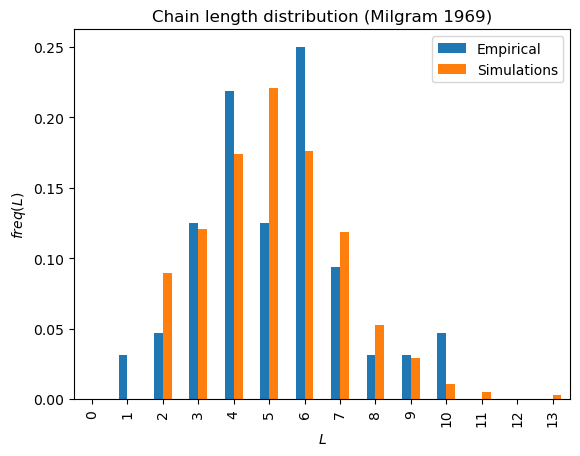

In [20]:
## Milgram ## 
# Gather output simulation
depths, sizes, apps, succs = R_milgram
depths_suc = np.array(depths)[succs]

# Trasnform chain length data into normalized distribution
milgram_sim = pd.Series(depths_suc).value_counts().sort_index()
milgram_sim /= milgram_sim.sum();

# Combine into a DataFrame
df_milgram = pd.concat([c_milgram, milgram_sim], axis=1)
df_milgram.columns = ['Empirical', 'Simulations']

avg_chain_lengths = (df_milgram.mul(df_milgram.index, axis=0)).sum()
print(f"""Average chain lengths:
 - {avg_chain_lengths.round(2).to_dict()}""")

# Plot side by side
df_milgram.plot(kind='bar')
plt.title("Chain length distribution (Milgram 1969)")
plt.xlabel('$L$')
plt.ylabel('$freq(L)$');

In [21]:
%%time
## Reproducing Dodds's 2003 experiment
np.random.seed(42)
τ = 0.06 # 1 - τ success line: these experiments should be ~near criticality
pr = bd.success_pr_at_prob_tau(P_HIRING, K_AVG, P_APPLICATION, τ) 

nsim = 500
R_dodds = perform_independent_model_simulations(
    n_simulations=nsim, 
    new_edgelist_every=nsim // 5,
    edgelist_generator=ER_GENERATOR,
    recommendation_probs=pr,
    application_probs=P_APPLICATION,
    hiring_probs=P_HIRING,
)
depths, sizes, apps, succs = R_dodds
depths_suc = np.array(depths)[succs]
sizes_suc = np.array(sizes)[succs]

print(f"Recommendation probability: {pr:.3f}%")
print(f"Success rate: {sum(succs)/len(succs)*100:.1f}%")
print(f"Average chain length: {np.mean(depths_suc):.2f}")
print(f"Max chain length: {np.max(depths_suc):.2f}");

Recommendation probability: 0.180%
Success rate: 92.8%
Average chain length: 4.14
Max chain length: 9.00
CPU times: user 6.9 s, sys: 368 ms, total: 7.27 s
Wall time: 7.31 s


Average chain lengths:
 - {'Empirical': 4.15, 'Simulations': 4.14}


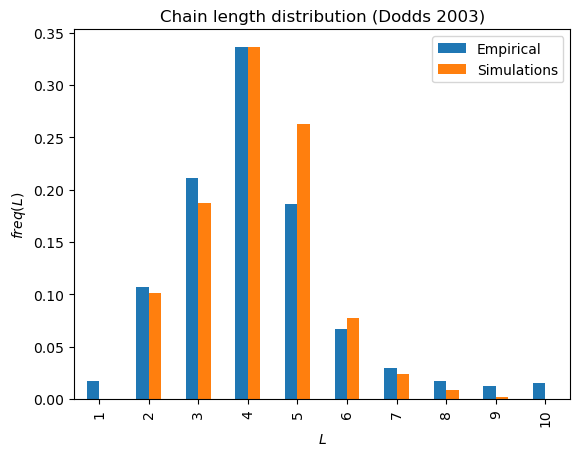

In [22]:
# Gather output simulation
depths, sizes, apps, succs = R_dodds
depths_suc = np.array(depths)[succs]

# Trasnform chain length data into normalized distribution
dodds_sim = pd.Series(depths_suc).value_counts().sort_index()
dodds_sim /= dodds_sim.sum();

# Combine into a DataFrame
# df = pd.concat([c_dodds, dodds_sim], axis=1)
df_dodds = pd.concat([c_dodds, dodds_sim], axis=1)
df_dodds.columns = ['Empirical', 'Simulations']

# Print average chain lengths
avg_chain_lengths = (df_dodds.mul(df_dodds.index, axis=0)).sum()
print(f"""Average chain lengths:
 - {avg_chain_lengths.round(2).to_dict()}""")

# Plot side by side
df_dodds.plot(kind='bar')
plt.title("Chain length distribution (Dodds 2003)")
plt.xlabel('$L$')
plt.ylabel('$freq(L)$');

In [23]:
SAVE = False
if SAVE:
    ## Save individual model realizations
    fn_prefix = 'depths-sizes-applications-successes-'
    fn_suffix = f'n_nodes={N_NODES}-k_avg={K_AVG}-pa={pa}-ph={ph}-tau={τ}.npy'
    fn_milgram = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Milgram-' + fn_prefix + fn_suffix)
    fn_dodds = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Dodds-' + fn_prefix + fn_suffix)
    save_experiment(fn_milgram, R_milgram)
    save_experiment(fn_dodds, R_dodds)
    
    # Save distributions (empirical and simulated)
    fn_df_milgram = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Milgram-depth_distribution-emprical_vs_simulation.csv')
    fn_df_dodds = os.path.join(PATH, 'milgram_and_dodds', 'ER', 'Dodds-depth_distribution-emprical_vs_simulation.csv')
    df_milgram.fillna(0).to_csv(fn_df_milgram)
    df_dodds.fillna(0).to_csv(fn_df_dodds)

These are the distributions we got when we ran the experiments for the paper
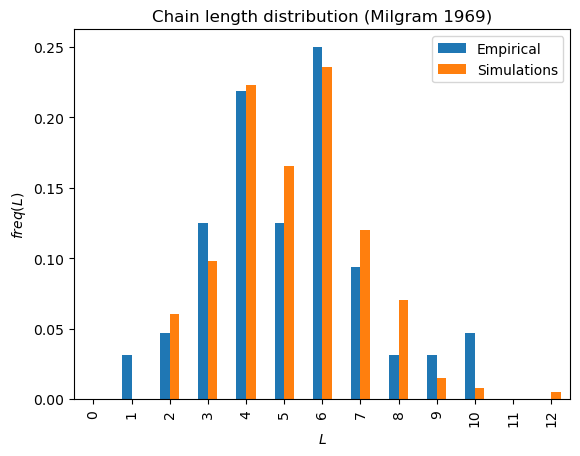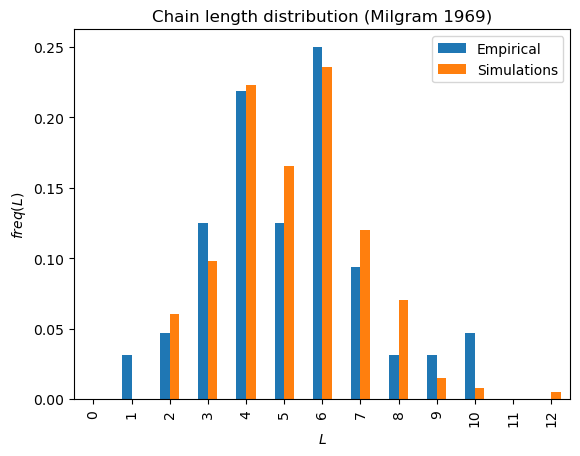
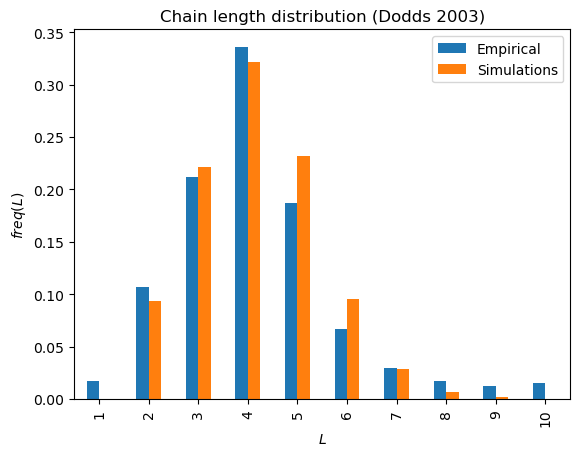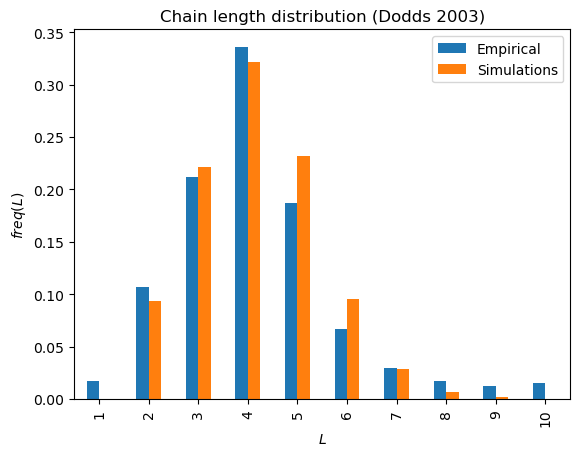

Hence, the *total expenditure* $X_{tot}$ for a task $\psi$ depends on its *depth* $K$ (where $K$ is the number of agents in the chain) and follows a geometric series:
$$ X(\psi) = \sum_{k=1}^K 2^{-k} B = B\left( 1 - 2^{-K} \right). $$

*Note:* More generally, the geometric series has a closed form expression $\sum_{k=1}^K r^k = \frac{r}{1-r} \left( 1 - r^K \right)$.

For a set of $n$ completed tasks $\Psi = \{\psi_1, \dots, \psi_n\}$ with depths $\mathbf{K} = [K_1, \dots, K_n]$, the total expenditure is:
$$ X_{tot} = \sum_{\psi \in \Psi} X(\psi) = B \sum_{ K \in \mathbf{K} } \left( 1 - 2^{-K} \right) = nB \left( 1 - \sum_{K \in \mathbf{K}} 2^{-K} \right) $$ 

In [815]:
def surplus_chain(chain_size, payload_frac=0.5):
    if payload_frac == 0.5:
        return 2**(-chain_size)
    else:
        return 1 - (payload_frac/(1 - payload_frac)*(1 - payload_frac**chain_size))

def surplus_total( chain_sizes, payload_frac=0.5 ):
    surpluses = [surplus_chain(chain_size) for chain_size in chain_sizes]
    return np.mean( surpluses )

# def f(x): return np.mean(x)

In [816]:
%%time
## Proportion of times the chains result in a successful hire. 

heatmap_data = []
row_labels = []
col_labels = []

for category, subcategories in chain_is_hired_ihcm2.items():
    row_labels.append(category)
    row_data = []
    for subcategory, values in subcategories.items():
        col_labels.append(subcategory)
        
        # row_data.append(f(values))
        row_data.append( np.mean(values) )
    heatmap_data.append(row_data)

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[::-1,:]

CPU times: user 33.8 ms, sys: 2.57 ms, total: 36.4 ms
Wall time: 35.7 ms


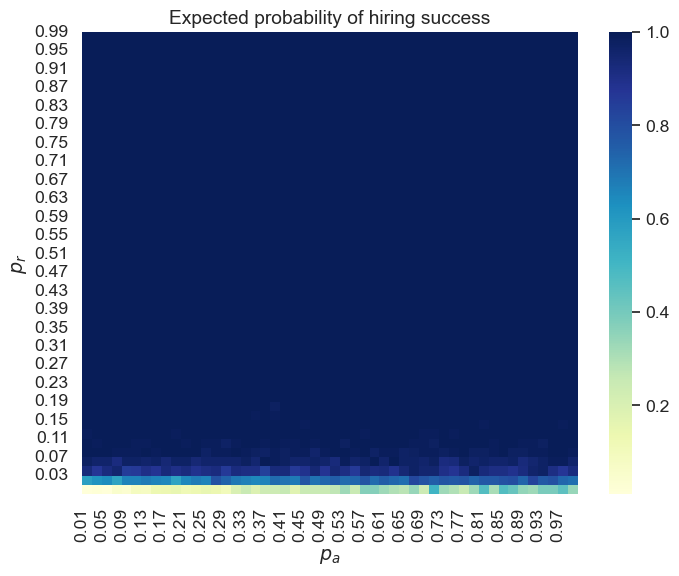

In [817]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.15)
sns.heatmap( heatmap_data, annot=False, fmt=".3f", cmap="YlGnBu")#, xticklabels=np.round(p_apps[::2],2), yticklabels=np.round(p_acts[:1],2))
plt.title("Expected probability of hiring success")
plt.yticks(range(0, len(p_acts), 2), np.round(p_acts[::-2],2), rotation=0)
plt.xticks(range(0, len(p_apps), 2), np.round(p_apps[::2],2), rotation=90)
plt.xlabel("$p_a$")
plt.ylabel("$p_r$")
plt.show()

Text(0.5, 1.0, 'Expected probability of successful hiring ($p_r = 0.07$)')

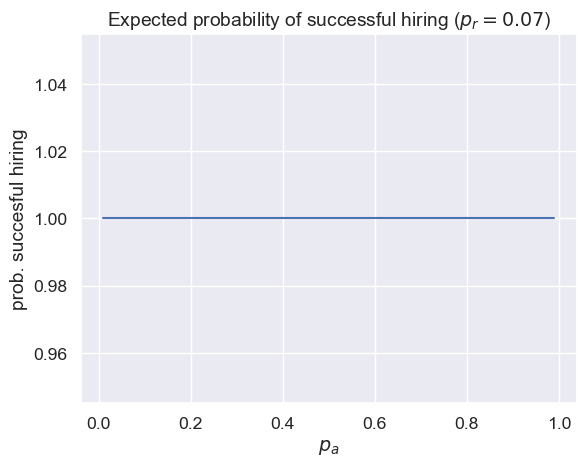

In [818]:
i = 3
plt.plot( p_apps, heatmap_data[i, :] )
plt.xlabel("$p_a$")
plt.ylabel("prob. succesful hiring")
plt.title("Expected probability of successful hiring ($p_r = {}$)".format( round(p_acts[i], 3) ))

In [873]:
%%time
## Average/median number of applicants

heatmap_data = []
row_labels = []
col_labels = []

for category, subcategories in chain_reaches_app_ihcm2.items():
    row_labels.append(category)
    row_data = []
    for subcategory, values in subcategories.items():
        col_labels.append(subcategory)
        
        # row_data.append( np.quantile(values, 0.9) )
        row_data.append( np.mean(values) )        
    heatmap_data.append(row_data)

heatmap_data = np.array(heatmap_data)
# heatmap_data = heatmap_data[::-1,:]

CPU times: user 31.8 ms, sys: 3.01 ms, total: 34.8 ms
Wall time: 34.3 ms


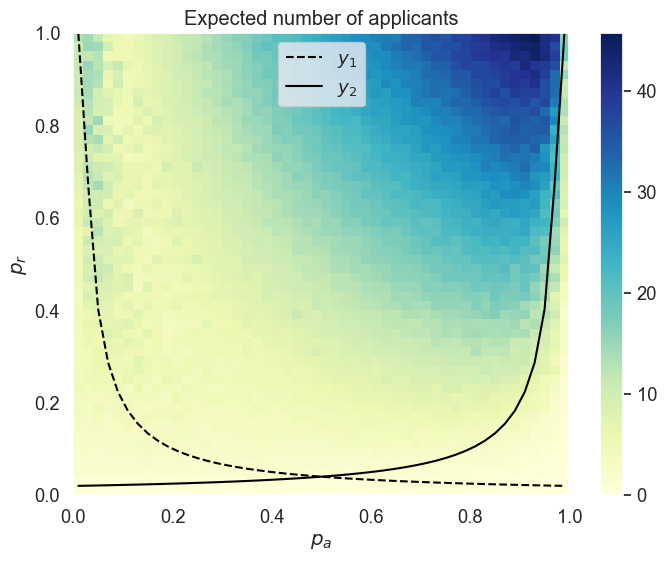

In [874]:
yv = np.clip(0, 1, pr_crit( np.array(p_apps), k_a, p_hir=1 ))
yv2 = np.clip(0, 1, pr_crit2( np.array(p_apps), k_a, p_hir=1 ))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

plt.imshow(heatmap_data, cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='lower')
plt.colorbar()
plt.plot(p_apps, yv, color='black', ls='--', label='$y_1$' )
plt.plot(p_apps, yv2, color='black', ls='-', label='$y_2$' )
plt.title("Expected number of applicants")

plt.xlabel("$p_a$")
plt.ylabel("$p_r$")
plt.plot(color='black', marker ='o')
plt.grid(False)
plt.legend();

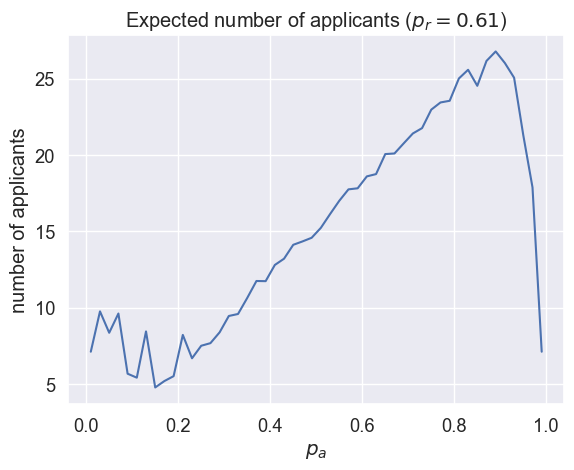

In [882]:
i = 30
plt.plot( p_apps, heatmap_data[i, :] )
plt.xlabel("$p_a$")
plt.ylabel("number of applicants")
plt.title("Expected number of applicants ($p_r = {}$)".format( round(p_acts[i], 3) ));

In [888]:
%%time
## Expected surplus fraction

heatmap_data = []
row_labels = []
col_labels = []

for category, subcategories in chain_depths_ihcm2.items():
    row_labels.append(category)
    row_data = []
    for subcategory, values in subcategories.items():
        col_labels.append(subcategory)
        
        row_data.append( surplus_total(values) )
        
    heatmap_data.append(row_data)

heatmap_data = np.array(heatmap_data)

CPU times: user 53.6 ms, sys: 6.53 ms, total: 60.2 ms
Wall time: 60.4 ms


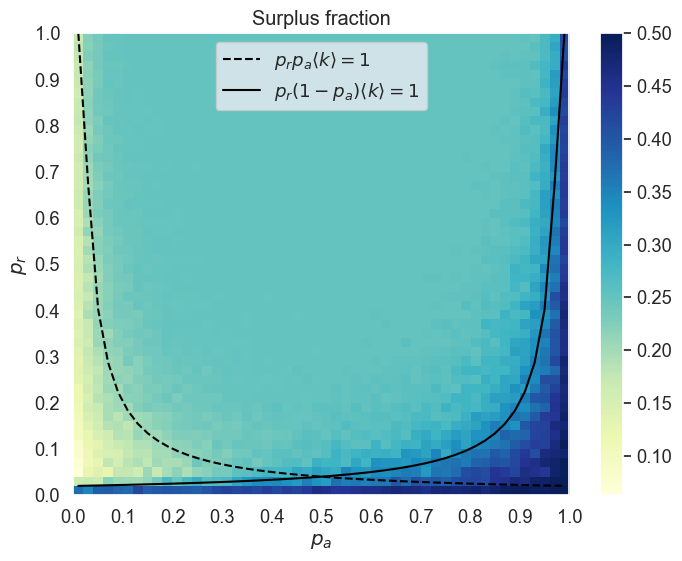

In [893]:
yv = np.clip(0, 1, pr_crit( np.array(p_apps), k_a, p_hir=1 ))
yv2 = np.clip(0, 1, pr_crit2( np.array(p_apps), k_a, p_hir=1 ))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

plt.imshow(heatmap_data, cmap="YlGnBu", extent=[0,1,0,1], label='', aspect='auto', origin='lower')
plt.colorbar()
plt.plot(p_apps, yv, color='black', ls='--', label='$p_r p_a \langle k \\rangle = 1$' )
plt.plot(p_apps, yv2, color='black', ls='-', label='$p_r (1 - p_a) \langle k \\rangle = 1$' )

plt.xticks( np.linspace(0, 1, 11) )
plt.yticks( np.linspace(0, 1, 11) )

plt.title("Surplus fraction")
plt.xlabel("$p_a$")
plt.ylabel("$p_r$")
plt.plot(color='black', marker ='o')
plt.grid(False)
plt.legend();

Text(0.5, 1.0, 'Expected surplus ($p_a = 0.21$)')

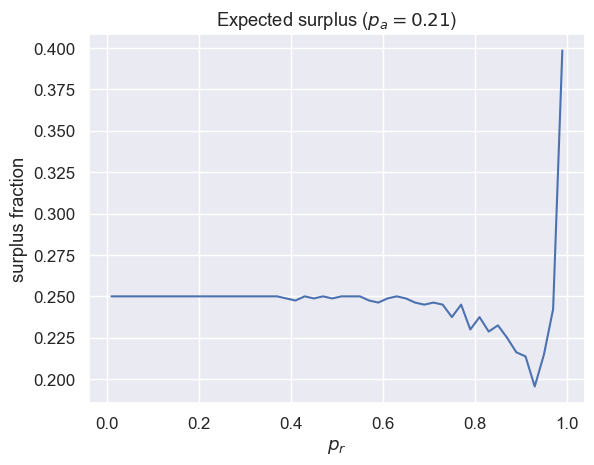

In [826]:
i = 10
plt.plot( p_apps, heatmap_data[:, i] )
# plt.xlabel("$p_a$")
plt.xlabel("$p_r$")
plt.ylabel("surplus fraction")
# plt.title("Expected surplus ($p_r = {}$)".format( round(p_acts[i], 3) ))
plt.title("Expected surplus ($p_a = {}$)".format( round(p_acts[i], 3) ))

In [853]:
%%time
## Expected surplus fraction

heatmap_data = []
row_labels = []
col_labels = []

for category, subcategories in chain_depths_ihcm2.items():
    row_labels.append(category)
    row_data = []
    for subcategory, values in subcategories.items():
        col_labels.append(subcategory)
        
        # row_data.append( np.quantile(values, 0.5) )        
        row_data.append( np.mean(values) )
        
    heatmap_data.append(row_data)

heatmap_data = np.array(heatmap_data)
heatmap_data = heatmap_data[::-1,:]

CPU times: user 27.6 ms, sys: 4.43 ms, total: 32.1 ms
Wall time: 32.5 ms


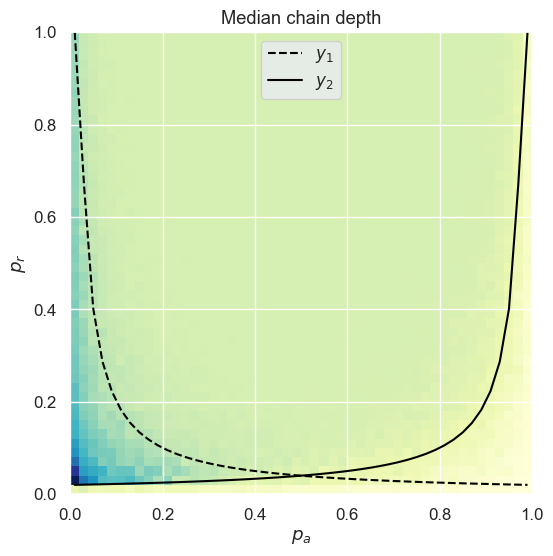

In [854]:
yv = np.clip(0, 1, pr_crit( np.array(p_apps), k_a, p_hir=1 ))
yv2 = np.clip(0, 1, pr_crit2( np.array(p_apps), k_a, p_hir=1 ))

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)

plt.imshow(heatmap_data, cmap="YlGnBu", extent=[0,1,0,1], label='')
plt.plot(p_apps, yv, color='black', ls='--', label='$y_1$' )
plt.plot(p_apps, yv2, color='black', ls='-', label='$y_2$' )
# plt.title("Expected chain depth")
plt.title("Median chain depth")

plt.xlabel("$p_a$")
plt.ylabel("$p_r$")
plt.plot(color='black', marker ='o')
plt.legend();

Binomial of $k$ successes in $n$ trials with probability $p$:
$$\binom{n}{k} p^k (1-p)^{n-k}$$

For $k = 0$ successes in $n = \langle k\rangle$ and $p = p_r p_a$, we get
$$ (1 - p_r p_a )^{\langle k\rangle} \approx 1 - \langle k\rangle p_r p_a $$ 

The expected number of successes is:
$$np = \langle k\rangle p_r p_a$$
and of failures it would be
$$n(1-p) = \langle k\rangle( 1 - p_r p_a)$$

<hr>
Successes (we'll call $k = \langle k \rangle$) :
$$ k p_rp_a = 1$$
$$ p_r = \frac{1}{k p_a}$$

$$1-p = \frac{1}{qk} $$
$$p = 1 - \frac{1}{qk}$$

(0.0, 1.0)

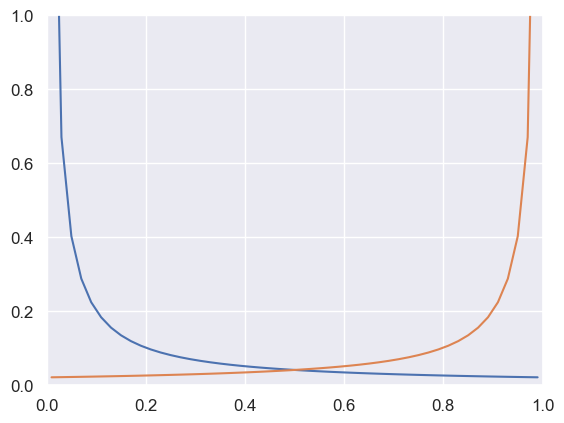

In [831]:
from scipy.special import binom
def pr_crit(p_app, k_avg, p_hir=1):
    return 1/( p_app * k_avg * p_hir )
def pr_crit2(p_app, k_avg, p_hir=1):
    return 1/( (1 -p_app) * k_avg * p_hir )

k_a = len(edgelist) / n_nodes
plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=1 ) )
plt.plot(p_apps, pr_crit2( np.array(p_apps), k_a, p_hir=1 ) )
# plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=0.5 ) )
# plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=0.1 ) )
plt.ylim(0,1)
plt.xlim(0,1)

In [916]:
k_a

49.7432

Text(0.5, 1.0, 'Probability of chain not spreading (you recommend')

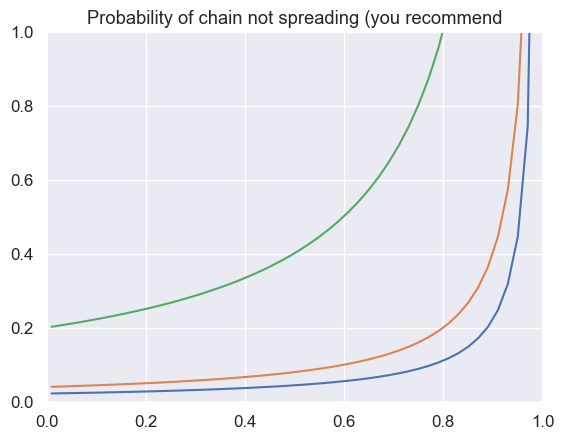

In [810]:
def pr_crit(p_app, k_avg, p_hir=1):
    return 1/( (1-p_app) * k_avg * p_hir )

k_a = len(edgelist) / n_nodes
plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=0.9 ) )
plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=0.5 ) )
plt.plot(p_apps, pr_crit( np.array(p_apps), k_a, p_hir=0.1 ) )
plt.ylim(0,1)
plt.xlim(0,1)
plt.title("Probability of chain not spreading (you recommend but not apply)")

In [194]:
p_act = 0.1
p_app = 0.25
p_hir = 0.5

ihcm = IndependentJobRecommendationCascadeModel(
    edgelist=edgelist,
    activation_probs=p_act,
    application_probs=p_app,
    hiring_probs=p_hir
)

ICM = IndependentJobRecommendationCascadeModel(
    edgelist=edgelist,
    activation_probs=p_act,
    application_probs=0.0,
    hiring_probs=0.0
)

In [195]:
%%time
initial_spreaders = [10]
d,a,h = ihcm.simulate(initial_spreaders=initial_spreaders)
d2,a2,h2 = ICM.simulate(initial_spreaders=initial_spreaders)

c = np.array( [len(x) for x in d] )
c2 = np.array( [len(x) for x in d2] )
ca = np.array( [len(x) for x in a] )

(
    "Recommenders diffusion sizes:"
    "with applicants:",
    list(c),
    "vanilla ICM:",
    list(c2),
    "Chain sizes (ihcm, ICM):",
    len(c),
    len(c2),
    "Total recommenders (ihcm, ICM):",
    sum(c),
    sum(c2),
    "Total applicants, total activated (recommender or applicant)",
    sum(ca),
    sum(ca) + sum(c),
)

CPU times: user 179 ms, sys: 31.1 ms, total: 210 ms
Wall time: 213 ms


('Recommenders diffusion sizes:with applicants:',
 [1, 1],
 'vanilla ICM:',
 [1, 5, 20, 104, 483, 1967, 4600, 2559, 178, 5, 2],
 'Chain sizes (IJRCM, ICM):',
 2,
 11,
 'Total recommenders (IJRCM, ICM):',
 2,
 9924,
 'Total applicants, total activated (recommender or applicant)',
 1,
 3)

In [378]:
from tqdm import tqdm

n_simulations = 10
p_acts = np.linspace(0.1, 0.99, num=40) 
p_apps = np.linspace(0.1, 0.99, num=40) 
p_hir = 0.5

chain_depths_ihcm = dict()
chain_reaches_ihcm = dict()
chain_reaches_act_ihcm = dict()
chain_reaches_app_ihcm = dict()

for p_act in tqdm(p_acts):#, desc="p_act={}".format( round(p_act,2) )):
    
    key_act = 'p_act={}'.format( round(p_act,2) )
    chain_depths_ihcm[key_act] = dict()
    chain_reaches_ihcm[key_act] = dict()
    chain_reaches_app_ihcm[key_act] = dict()
    chain_reaches_act_ihcm[key_act] = dict()
    
    for p_app in p_apps:

        key_app = 'p_app={}'.format( round(p_app,2) )
        chain_depths_ihcm[key_act][key_app] = []
        chain_reaches_ihcm[key_act][key_app] = []
        chain_reaches_app_ihcm[key_act][key_app] = []
        chain_reaches_act_ihcm[key_act][key_app] = []

        for _ in range(n_simulations): #tqdm( range(n_simulations), desc='{},{}'.format(key_act, key_app) ):
        
            initial_spreaders = np.random.choice( range(n_nodes), 1 )
            
            ihcm = IndependentJobRecommendationCascadeModel(
                edgelist=edgelist,
                activation_probs=p_act,
                application_probs=p_app,
                hiring_probs=p_hir
            )
                        
            activated_ihcm, applicants_ihcm, hired_ihcm = ihcm.simulate(
                initial_spreaders=initial_spreaders, max_diffusion_time=100
            )

            chain_depth = len(activated_ihcm)
            chain_sizes_act = [len( step ) for step in activated_ihcm]
            chain_sizes_app = [len( step ) for step in applicants_ihcm]
            chain_reach_act = sum(chain_sizes_act)
            chain_reach_app = sum(chain_sizes_app)
            chain_reach = chain_reach_act + chain_reach_app
                        
            chain_depths_ihcm[key_act][key_app].append( chain_depth )
            chain_reaches_ihcm[key_act][key_app].append( chain_reach )
            chain_reaches_act_ihcm[key_act][key_app].append( chain_reach_act )
            chain_reaches_app_ihcm[key_act][key_app].append( chain_reach_app )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [10:50<00:00, 16.27s/it]


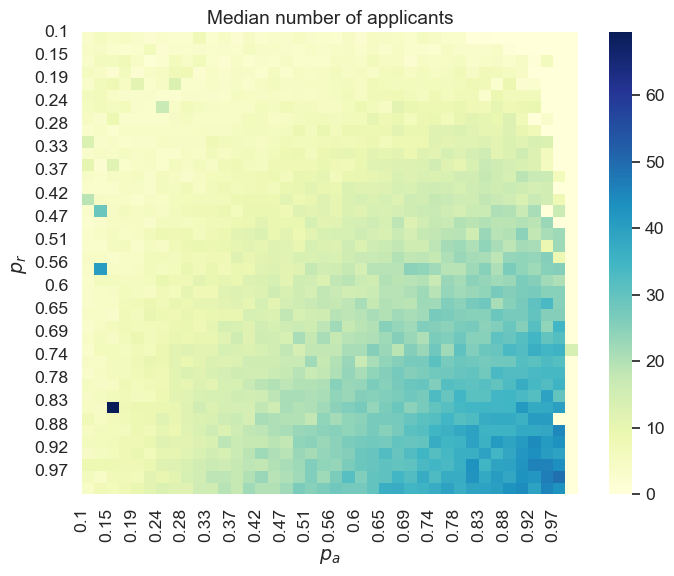

In [442]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.15)
sns.heatmap(heatmap_data, annot=False, fmt=".3f", cmap="YlGnBu")#, xticklabels=np.round(p_apps[::2],2), yticklabels=np.round(p_acts[:1],2))
plt.title("Median number of applicants")
plt.yticks(range(0, len(p_acts), 2), np.round(p_acts[::2],2), rotation=0)
plt.xticks(range(0, len(p_apps), 2), np.round(p_apps[::2],2), rotation=90)
plt.xlabel("$p_a$")
plt.ylabel("$p_r$")
plt.show()

In [ ]:
# %%time 
# from tqdm import tqdm

# # n_simulations = 10
# # p_acts = np.linspace(0.1, 0.99, num=40) 
# # p_apps = np.linspace(0.1, 0.99, num=40) 
# p_hir = 0.5

# n_simulations = 10
# # Define your lists x and y
# p_acts = np.linspace(0.01, 0.99, num=8) 
# p_apps = np.linspace(0.01, 0.99, num=8) 

# chain_depths_ihcm = dict()
# # chain_reaches_ihcm = dict()
# # chain_reaches_act_ihcm = dict()
# # chain_reaches_app_ihcm = dict()

# for p_act in tqdm(p_acts):#, desc="p_act={}".format( round(p_act,2) )):
    
#     key_act = 'p_act={}'.format( round(p_act,2) )
#     chain_depths_ihcm[key_act] = dict()
#     chain_reaches_ihcm[key_act] = dict()
#     chain_reaches_app_ihcm[key_act] = dict()
#     chain_reaches_act_ihcm[key_act] = dict()
    
#     for p_app in p_apps:

#         key_app = 'p_app={}'.format( round(p_app,2) )
#         chain_depths_ihcm[key_act][key_app] = []
#         chain_reaches_ihcm[key_act][key_app] = []
#         chain_reaches_app_ihcm[key_act][key_app] = []
#         chain_reaches_act_ihcm[key_act][key_app] = []

#         for _ in range(n_simulations): #tqdm( range(n_simulations), desc='{},{}'.format(key_act, key_app) ):
        
#             initial_spreaders = np.random.choice( range(n_nodes), 1 )
            
#             ihcm = IndependentJobRecommendationCascadeModel(
#                 edgelist=edgelist,
#                 activation_probs=p_act,
#                 application_probs=p_app,
#                 hiring_probs=p_hir
#             )
                        
#             activated_ihcm, applicants_ihcm, hired_ihcm = ihcm.simulate(
#                 initial_spreaders=initial_spreaders, max_diffusion_time=100
#             )

#             chain_depth = len(activated_ihcm)
#             # chain_sizes_act = [len( step ) for step in activated_ihcm]
#             # chain_sizes_app = [len( step ) for step in applicants_ihcm]
#             # chain_reach_act = sum(chain_sizes_act)
#             # chain_reach_app = sum(chain_sizes_app)
#             # chain_reach = chain_reach_act + chain_reach_app
                        
#             chain_depths_ihcm[key_act][key_app].append( chain_depth )
#             # chain_reaches_ihcm[key_act][key_app].append( chain_reach )
#             # chain_reaches_act_ihcm[key_act][key_app].append( chain_reach_act )
#             # chain_reaches_app_ihcm[key_act][key_app].append( chain_reach_app )

Text(0.5, 1.0, 'Chain sizes distribution ($p_r = 0.1, p_a = 0.25, p_h = 0.5$)')

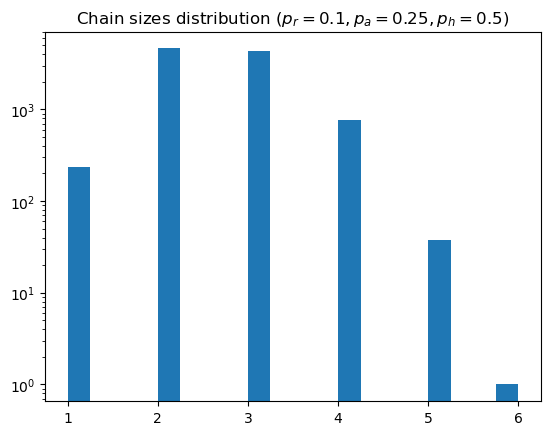

In [197]:
import matplotlib.pyplot as plt

plt.hist( chain_sizes, bins=20 )
plt.yscale('log')
plt.title( "Chain sizes distribution ($p_r = {}, p_a = {}, p_h = {}$)".format( p_act, p_app, p_hir ) )

Text(0.5, 1.0, 'Chain sizes distribution ($p_r = 0.2, p_a = 0.1, p_h = 0.4$)')

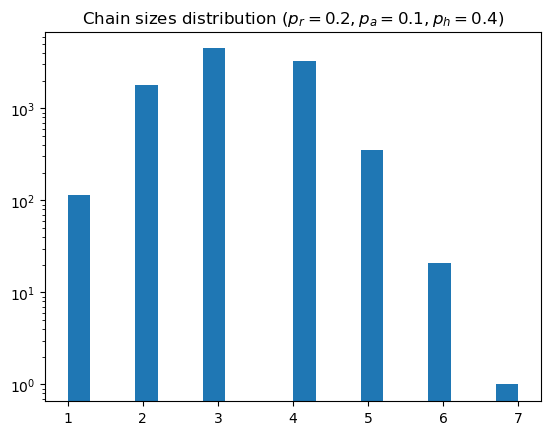

In [189]:
plt.hist( chain_sizes, bins=20 )
plt.yscale('log')
plt.title( "Chain sizes distribution ($p_r = {}, p_a = {}, p_h = {}$)".format( p_act, p_app, p_hir ) )